In [1]:
import pandas as pd
def load_data(file_l, file_r):
    df = pd.read_csv(file_l)
    df_r = pd.read_csv(file_r)
    df = pd.concat([df,df_r])
    return df

file_l = r'\\files.ubc.ca\team\PPRC\Camera\Booth_Results\finger_tapping_ws\Experiment2\csvs\left_features_extracted_finger_distance.csv'
file_r = r'\\files.ubc.ca\team\PPRC\Camera\Booth_Results\finger_tapping_ws\Experiment2\csvs\right_features_extracted_finger_distance.csv'
L_file = r'\\files.ubc.ca\team\PPRC\Camera\Booth_Results\finger_tapping_ws\Experiment2\csvs\weak_supervision_L.csv'
df = load_data(file_l, file_r)

### Statistical Test

In [1]:

#Explore  wich feature is the best find significant features
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif
import scipy.stats as stats

# Load the data
file = r'\\files.ubc.ca\team\PPRC\Camera\Booth_Results\finger_tapping_ws\Experiment2\csvs\left_features_extracted_finger_distance.csv'
df = pd.read_csv(file)

# Define the features and target
X = df.drop(columns=['file_name'])
y = df['file_name'].str.startswith(('07', '06')).astype(int)
X.fillna(0, inplace=True)


# Select the top 10 features
selector = SelectKBest(score_func=f_classif, k=10)
selector.fit(X, y)
X_selected = selector.transform(X)
print(X.columns[selector.get_support()])



# Assuming X is your feature matrix and y is your target variable
# Perform t-test for each feature against the target variable
significant_features = []
for feature in X.columns:
    t_stat, p_value = stats.ttest_ind(X[y == 0][feature], X[y == 1][feature])
    if p_value < 0.05:  # Set your desired significance level
        significant_features.append(feature)

print("Significant features:", significant_features)

Index(['interval_variation', 'interval_mse',
       'Finger Normalized Distance_mean_amplitude',
       'Finger Normalized Distance_peak_amplitude',
       'Finger Distance_peak_amplitude', 'FC_LocalSimple_mean1_tauresrat',
       'Angular Distance_mean_amplitude', 'Angular Distance_consistency',
       'Angular Distance_peak_amplitude', 'Angular Distance_power'],
      dtype='object')
Significant features: ['interval_variation', 'interval_mse', 'interval_mean', 'Finger Normalized Distance_mean_amplitude', 'Finger Normalized Distance_halts_and_hesitations', 'Finger Normalized Distance_consistency', 'Finger Normalized Distance_peak_amplitude', 'Finger Normalized Distance_power', 'Finger Distance_mean_amplitude', 'Finger Distance_halts_and_hesitations', 'Finger Distance_consistency', 'Finger Distance_peak_amplitude', 'Finger Distance_power', 'SB_BinaryStats_mean_longstretch1', 'IN_AutoMutualInfoStats_40_gaussian_fmmi', 'FC_LocalSimple_mean1_tauresrat', 'SB_BinaryStats_diff_longstretch0',

c:\Users\atefe\.conda\envs\myenv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [19] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\atefe\.conda\envs\myenv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [44]:
#investigate is there any difference between right and left hand
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from imblearn.over_sampling import SMOTE


file_l = r'\\files.ubc.ca\team\PPRC\Camera\Booth_Results\finger_tapping_ws\Experiment2\csvs\left_features_extracted_finger_distance.csv'
file_r = r'\\files.ubc.ca\team\PPRC\Camera\Booth_Results\finger_tapping_ws\Experiment2\csvs\right_features_extracted_finger_distance.csv'
df_l = pd.read_csv(file_l)
df_r = pd.read_csv(file_r)

# Define the features and target
X_l = df_l.drop(columns=['file_name'])
y_l = (df_l['file_name'].str.startswith('07') | df_l['file_name'].str.startswith('06')).astype(int)
X_l.fillna(0, inplace=True)

X_r = df_r.drop(columns=['file_name'])
y_r = (df_r['file_name'].str.startswith('07') | df_r['file_name'].str.startswith('06')).astype(int)
X_r.fillna(0, inplace=True)


from scipy.stats import ttest_ind

# Perform t-tests between corresponding features of left and right hand
p_values = {}
for feature in X_l.columns:
    t_stat, p_value = ttest_ind(X_l[feature], X_r[feature], equal_var=False)
    p_values[feature] = p_value

# Display the p-values
print("T-test results (p-values) between left and right hand features:")
for feature, p_value in p_values.items():
    print(f"{feature}: {p_value:.4f}")

# Optionally, identify features with significant differences
significant_features = {feature: p for feature, p in p_values.items() if p < 0.05}
print("\nFeatures with significant differences (p < 0.05):")
for feature, p_value in significant_features.items():
    print(f"{feature}: {p_value:.4f}")



T-test results (p-values) between left and right hand features:
taps: 0.8308
interval_variation: 0.1118
tapping_frequency: 0.9209
task_duration: 0.7143
tapping_start_time: 0.0000
interval_mse: 0.1118
interval_mean: 0.4102
Finger Normalized Distance_mean_amplitude: 0.1759
Finger Normalized Distance_std_amplitude: 0.0465
Finger Normalized Distance_amplitude_mse: 0.0465
Finger Normalized Distance_amplitude_decrement: 0.0593
Finger Normalized Distance_frequency_decrement: 0.0561
Finger Normalized Distance_mean_tap_speed: 0.7047
Finger Normalized Distance_halts_and_hesitations: 0.8344
Finger Normalized Distance_consistency: 0.2670
Finger Normalized Distance_peak_frequency: 0.2594
Finger Normalized Distance_peak_amplitude: 0.4714
Finger Normalized Distance_frequency_consistency: 0.1657
Finger Normalized Distance_power: 0.2674
Finger Normalized Distance_num_peaks: nan
Finger Distance_mean_amplitude: 0.6940
Finger Distance_std_amplitude: 0.6765
Finger Distance_amplitude_mse: 0.6765
Finger Dist

### Binary Classifier

In [37]:
import lightgbm as lgb
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, make_scorer, precision_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
import numpy as np

file_l = r'\\files.ubc.ca\team\PPRC\Camera\Booth_Results\finger_tapping_ws\Experiment2\csvs\left_features_extracted_finger_distance.csv'
file_r = r'\\files.ubc.ca\team\PPRC\Camera\Booth_Results\finger_tapping_ws\Experiment2\csvs\right_features_extracted_finger_distance.csv'
df = pd.read_csv(file_l)
df_r = pd.read_csv(file_r)
df = pd.concat([df, df_r])

# Define the features and target
X = df.drop(columns=['file_name'])
y = (df['file_name'].str.startswith('07') | df['file_name'].str.startswith('06')).astype(int)
X.fillna(0, inplace=True)

# Select the top 8 features
selector = SelectKBest(score_func=f_classif, k=20)
selector.fit(X, y)
X_selected = selector.transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=35)

# Use SMOTE to handle class imbalance
smote = SMOTE(sampling_strategy=0.8,random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
# Create a RandomForestClassifier
class_weights = {0:6.0, 1: 1.0}
best_clf = RandomForestClassifier(n_estimators=300, random_state=42, class_weight='balanced')
best_clf.fit(X_train_res, y_train_res)
# Make predictions
y_pred = best_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)
#print confusion matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)


c:\Users\atefe\.conda\envs\myenv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [19] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\atefe\.conda\envs\myenv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Accuracy: 0.7528089887640449
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.81      0.84        69
           1       0.46      0.55      0.50        20

    accuracy                           0.75        89
   macro avg       0.66      0.68      0.67        89
weighted avg       0.77      0.75      0.76        89

[[56 13]
 [ 9 11]]


### Multi class classification

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
import joblib
from tqdm import tqdm

# Load the data
file_l = r'\\files.ubc.ca\team\PPRC\Camera\Booth_Results\finger_tapping_ws\Experiment2\csvs\left_features_extracted_finger_distance.csv'
file_r = r'\\files.ubc.ca\team\PPRC\Camera\Booth_Results\finger_tapping_ws\Experiment2\csvs\right_features_extracted_finger_distance.csv'
df_l_r = pd.concat([pd.read_csv(file_l), pd.read_csv(file_r)])
file1 = r'\\files.ubc.ca\team\PPRC\Camera\Booth_Results\finger_tapping_ws\Experiment2\csvs\number_of_taps.csv'
df_updrs = pd.read_csv(file1)

df = pd.merge(df_l_r, df_updrs[['file_name', 'UPDRS']], on='file_name', how='left')
df = df.dropna(subset=['UPDRS'])

# Define the features and target
X = df.drop(columns=['file_name', 'UPDRS'])
y = df['UPDRS']
X.fillna(0, inplace=True)
file_names = df['file_name']

# Feature selection
selector = SelectKBest(score_func=f_classif, k=20)
selector.fit(X, y)
X_selected = selector.transform(X)

# Initialize the leave-one-out cross-validator
loo = LeaveOneOut()
smote = SMOTE( random_state=42)

# Initialize lists to store results
all_preds = []
all_labels = []
all_file_names = []

# Loop over each split
for train_index, test_index in tqdm(loo.split(X_selected)):
    X_train, X_test = X_selected[train_index], X_selected[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    file_name_test = file_names.iloc[test_index].values[0]
    
    # Apply SMOTE to the training data
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Initialize and train the classifier
    clf = RandomForestClassifier(random_state=42, n_estimators=500, max_depth=12)
    clf.fit(X_train_resampled, y_train_resampled)

    # Make prediction for the test instance
    y_pred = clf.predict(X_test)

    # Store the results
    all_preds.append(y_pred[0])
    all_labels.append(y_test.values[0])
    all_file_names.append(file_name_test)

# Evaluate the classifier
print("Confusion Matrix:")
print(confusion_matrix(all_labels, all_preds))
print("\nClassification Report:")
print(classification_report(all_labels, all_preds))
print("\nAccuracy Score:")
print(accuracy_score(all_labels, all_preds))

# Calculate and print MAE and MSE
mae = mean_absolute_error(all_labels, all_preds)
mse = mean_squared_error(all_labels, all_preds)
print(f"\nMean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

# Save the model, feature selector, and predictions
#joblib.dump(clf, 'rf_model.pkl')
#joblib.dump(selector, 'feature_selector.pkl')

results_df = pd.DataFrame({
    'File_Name': all_file_names,
    'True_Label': all_labels,
    'Predicted_Label': all_preds
})

# Identify rows in df_l_r not in results_df and predict their labels
unprocessed_files = df_l_r[~df_l_r['file_name'].isin(results_df['File_Name'])]

if not unprocessed_files.empty:
    unprocessed_X = unprocessed_files.drop(columns=['file_name'])
    unprocessed_X = unprocessed_X[X.columns]
    unprocessed_X.fillna(0, inplace=True)

    # Apply the same scaling and transformation
    unprocessed_X_selected = selector.transform(unprocessed_X)
    unprocessed_preds = clf.predict(unprocessed_X_selected)

    unprocessed_results_df = pd.DataFrame({
        'File_Name': unprocessed_files['file_name'],
        'True_Label': np.nan,  # True labels are not available for these
        'Predicted_Label': unprocessed_preds
    })

    # Add these predictions to the original results_df
    results_df = pd.concat([results_df, unprocessed_results_df], ignore_index=True)

# Save all results to a CSV file
#results_df.to_csv('complete_predicted_labels_loocv.csv', index=False)

print("Model, feature selector, and all predicted labels saved successfully.")


c:\Users\atefe\.conda\envs\assessment\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [19] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\atefe\.conda\envs\assessment\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
176it [02:12,  1.33it/s]

Confusion Matrix:
[[ 6  8  8  4  0]
 [11  6  7  3  0]
 [ 8 15 16 16  1]
 [ 2  5 17 24  5]
 [ 0  0  2  5  7]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.22      0.23      0.23        26
         1.0       0.18      0.22      0.20        27
         2.0       0.32      0.29      0.30        56
         3.0       0.46      0.45      0.46        53
         4.0       0.54      0.50      0.52        14

    accuracy                           0.34       176
   macro avg       0.34      0.34      0.34       176
weighted avg       0.34      0.34      0.34       176


Accuracy Score:
0.3352272727272727

Mean Absolute Error (MAE): 0.8863636363636364
Mean Squared Error (MSE): 1.3977272727272727
Model, feature selector, and all predicted labels saved successfully.


In [18]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import RFECV
import pandas as pd 
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, make_scorer, precision_score
from sklearn.feature_selection import SelectKBest 
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
import joblib

def load_data(file_l, file_r):
    df = pd.read_csv(file_l)
    df_r = pd.read_csv(file_r)
    df = pd.concat([df,df_r])
    return df
# Load the data
file_l = r'\\files.ubc.ca\team\PPRC\Camera\Booth_Results\finger_tapping_ws\Experiment2\csvs\left_features_extracted_finger_distance.csv'
file_r = r'\\files.ubc.ca\team\PPRC\Camera\Booth_Results\finger_tapping_ws\Experiment2\csvs\right_features_extracted_finger_distance.csv'
df = load_data(file_l, file_r)
file1 = r'\\files.ubc.ca\team\PPRC\Camera\Booth_Results\finger_tapping_ws\Experiment2\csvs\combined_updrs.csv'
df_updrs = pd.read_csv(file1)
df_updrs['file_name'] = df_updrs['ID']+'_finger_tapping_distances.csv'

df = pd.merge(df, df_updrs[['file_name','SA']], on='file_name', how='left')
#rename column MG to UPDRS
df.rename(columns={'SA':'UPDRS'}, inplace=True)
# calculate the mean square error and accuracy of each column with respect to the expert count
df = df.dropna()


# Define the features and target
X = df.drop(columns=['file_name','UPDRS'])
y = df['UPDRS']

# Store the file names for later use in visualization
file_names = df['file_name']

selector = SelectKBest(score_func=f_classif, k=25)
selector.fit(X, y)
X_selected = selector.transform(X)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test, file_names_train, file_names_test = train_test_split(X_selected, y, file_names, test_size=0.1, random_state=17)
smote = SMOTE(sampling_strategy={0:360,1:140,2:140,3:140,4:100}, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

clf = RandomForestClassifier(random_state=42, n_estimators=500, max_depth=12)
# Train the classifier
clf.fit(X_train_resampled, y_train_resampled)


# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the classifier
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#save the model
# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = X.columns[selected_feature_indices]

# Save the selected feature indices and names along with the model
save_data = {
    'model': clf,
    'selected_features': selected_feature_names
}

model_filename = r'\\files.ubc.ca\team\PPRC\Camera\Booth_Results\finger_tapping_ws\Experiment2\models\RFC_4cl_model_v1.pkl'
joblib.dump(save_data, model_filename)
print(f"Model and selected features saved to {model_filename}")




c:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [19] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Confusion Matrix:
[[8 2 0 0 0]
 [1 1 1 3 0]
 [1 2 6 3 1]
 [0 1 1 6 2]
 [0 0 0 1 2]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80        10
         1.0       0.17      0.17      0.17         6
         2.0       0.75      0.46      0.57        13
         3.0       0.46      0.60      0.52        10
         4.0       0.40      0.67      0.50         3

    accuracy                           0.55        42
   macro avg       0.52      0.54      0.51        42
weighted avg       0.58      0.55      0.55        42

Model and selected features saved to \\files.ubc.ca\team\PPRC\Camera\Booth_Results\finger_tapping_ws\Experiment2\models\RFC_4cl_model_v1.pkl


c:\Users\atefe\.conda\envs\myenv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning:

Features [19] are constant.

c:\Users\atefe\.conda\envs\myenv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning:

invalid value encountered in divide



Mean Squared Error: 1.1547251250992463
Mean Absolute Error: 0.8541925081776135
Accuracy: 0.6984126984126984


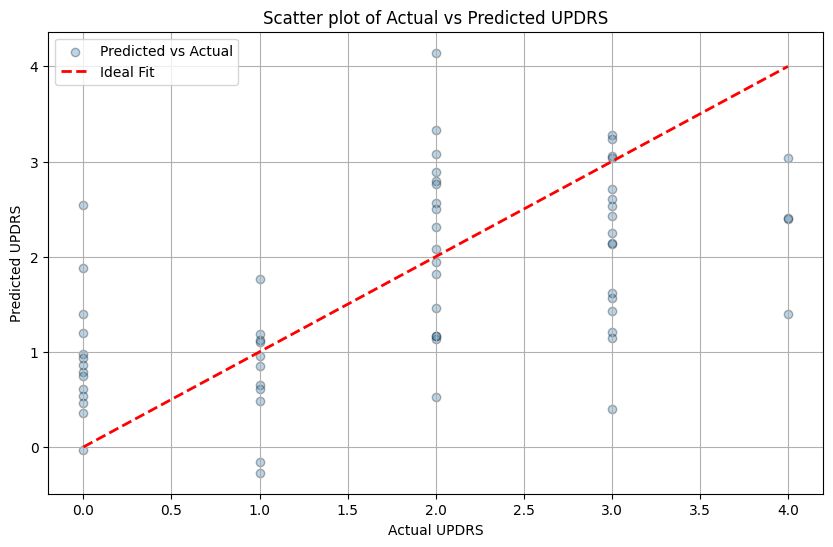

In [120]:
#Regression
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.feature_selection import RFECV, SelectKBest, f_classif
from imblearn.over_sampling import SMOTE

# Load the data
file_l = r'\\files.ubc.ca\team\PPRC\Camera\Booth_Results\finger_tapping_ws\Experiment2\csvs\left_features_extracted_finger_distance.csv'
file_r = r'\\files.ubc.ca\team\PPRC\Camera\Booth_Results\finger_tapping_ws\Experiment2\csvs\right_features_extracted_finger_distance.csv'
df = pd.read_csv(file_l)
df_r = pd.read_csv(file_r)
df = pd.concat([df,df_r])
file1 = r'\\files.ubc.ca\team\PPRC\Camera\Booth_Results\finger_tapping_ws\Experiment2\csvs\combined_updrs.csv'
df_updrs = pd.read_csv(file1)
df_updrs['file_name'] = df_updrs['ID']+'_finger_tapping_distances.csv'

df = pd.merge(df, df_updrs[['file_name','SA']], on='file_name', how='left')
#rename column MG to UPDRS
df.rename(columns={'SA':'UPDRS'}, inplace=True)
# calculate the mean square error and accuracy of each column with respect to the expert count
df = df.dropna()


# Define the features and target
X = df.drop(columns=['file_name','UPDRS'])
y = df['UPDRS']

# Store the file names for later use in visualization
file_names = df['file_name']

# Use SelectKBest for feature selection
selector = SelectKBest(score_func=f_classif, k=30)
X = X.fillna(0)
selector.fit(X, y)
X_selected = selector.transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test, file_names_train, file_names_test = train_test_split(X_selected, y, file_names, test_size=0.15, random_state=22)

# Apply SMOTE to the training data (regression version of SMOTE may be more appropriate)
smote = SMOTE(sampling_strategy={0:1000,1:400,2:400,3:300,4:300}, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
from imblearn.over_sampling import SMOTENC
from sklearn.utils import class_weight
from sklearn.ensemble import GradientBoostingRegressor

# Calculate class weights (for use with GradientBoostingRegressor)
sample_weights = class_weight.compute_sample_weight(class_weight={0:2.0, 1: 1.0, 2:1.0,3:1.0,4:1.0}, y=y_train_resampled)

# Train the Gradient Boosting Regressor with sample weights
regressor = GradientBoostingRegressor(n_estimators=300, random_state=42)
regressor.fit(X_train_resampled, y_train_resampled, sample_weight=sample_weights)

# Make predictions
y_pred = regressor.predict(X_test)

# Evaluate the regressor
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
#y absolute predicted value

accuracy = np.mean(np.abs(y_test - y_pred) < 1)
print("Accuracy:", accuracy)


import matplotlib.pyplot as plt
# Plotting the scatter plot of predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3, edgecolor='k', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('Actual UPDRS')
plt.ylabel('Predicted UPDRS')
plt.title('Scatter plot of Actual vs Predicted UPDRS')
plt.legend()
plt.grid(True)
plt.show()

#TSNE for visualization
from sklearn.manifold import TSNE
import plotly.express as px
# Apply t-SNE to the training data
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X)

# Create a DataFrame for visualization
df_tsne_train = pd.DataFrame(X_train_tsne, columns=['TSNE Component 1', 'TSNE Component 2'])
df_tsne_train['label'] = y.to_list()
df_tsne_train['file_name'] = file_names.to_list()

# Plot t-SNE results for the training data
fig_train = px.scatter(df_tsne_train, x='TSNE Component 1', y='TSNE Component 2', color='label', hover_data=['file_name'],
                       title='t-SNE Visualization of the Training Data')
fig_train.show()




In [26]:
#Load Model and save results as new L file
import joblib

model_filename = r'\\files.ubc.ca\team\PPRC\Camera\Booth_Results\finger_tapping_ws\Experiment2\models\RFC_4cl_model_v1.pkl'

# Load the model and selected features from the file
loaded_data = joblib.load(model_filename)
loaded_model = loaded_data['model']
selected_feature_names = loaded_data['selected_features']

print("Model and selected features loaded successfully")
print(f"Selected features: {selected_feature_names}")

# You can now use loaded_regressor and the selected features as needed
file1 = r'\\files.ubc.ca\team\PPRC\Camera\Booth_Results\finger_tapping_ws\Experiment2\csvs\combined_updrs.csv'
df_updrs = pd.read_csv(file1)
df_updrs['file_name'] = df_updrs['ID']+'_finger_tapping_distances.csv'
df_updrs.drop(columns=['ID'], inplace=True)



Model and selected features loaded successfully
Selected features: Index(['taps', 'interval_variation', 'task_duration', 'interval_mse',
       'Finger Normalized Distance_mean_amplitude',
       'Finger Normalized Distance_halts_and_hesitations',
       'Finger Normalized Distance_peak_amplitude',
       'Finger Normalized Distance_frequency_consistency',
       'Finger Distance_mean_amplitude',
       'Finger Distance_halts_and_hesitations', 'Finger Distance_consistency',
       'Finger Distance_peak_amplitude',
       'Finger Distance_frequency_consistency', 'Finger Distance_power',
       'IN_AutoMutualInfoStats_40_gaussian_fmmi',
       'FC_LocalSimple_mean1_tauresrat', 'SB_BinaryStats_diff_longstretch0',
       'Angular Distance_mean_amplitude',
       'Angular Distance_halts_and_hesitations',
       'Angular Distance_consistency', 'Angular Distance_peak_frequency',
       'Angular Distance_peak_amplitude',
       'Angular Distance_frequency_consistency', 'Angular Distance_power'

In [ ]:
#combine L_file wth classifier and severiy score
import pandas as pd
import numpy as np


df_severity = pd.read_csv(r'\\files.ubc.ca\team\PPRC\Camera\Booth_Results\finger_tapping_ws\Experiment2\csvs\predicted_labels_severity.csv')
df_classifier = pd.read_csv('complete_predicted_labels_loocv.csv').set_index('File_Name')
df_L = df_updrs.copy()
#drop duplicate file_name where other values are not available
df_L.drop_duplicates(subset='file_name', inplace=True)
df_L = df_L.set_index('file_name')

df_L['classifier'] = df_classifier['Predicted_Label']
df_severity['file_name'] = df_severity['Patient_ID']+'_finger_tapping_distances.csv'
df_severity = df_severity.drop(columns=['Patient_ID']).set_index('file_name')

df_L = df_L.join(df_severity)
df_L.rename(columns={'Predicted_Label':'severity model'}, inplace=True)
df_L['severity model'] = df_L['severity model'].round(0)
df_L.to_csv(L_file, index=True)

INFO:root:Computing O...
INFO:root:Estimating \mu...


nan


100%|██████████| 100/100 [00:00<00:00, 1043.57epoch/s]
INFO:root:Finished Training


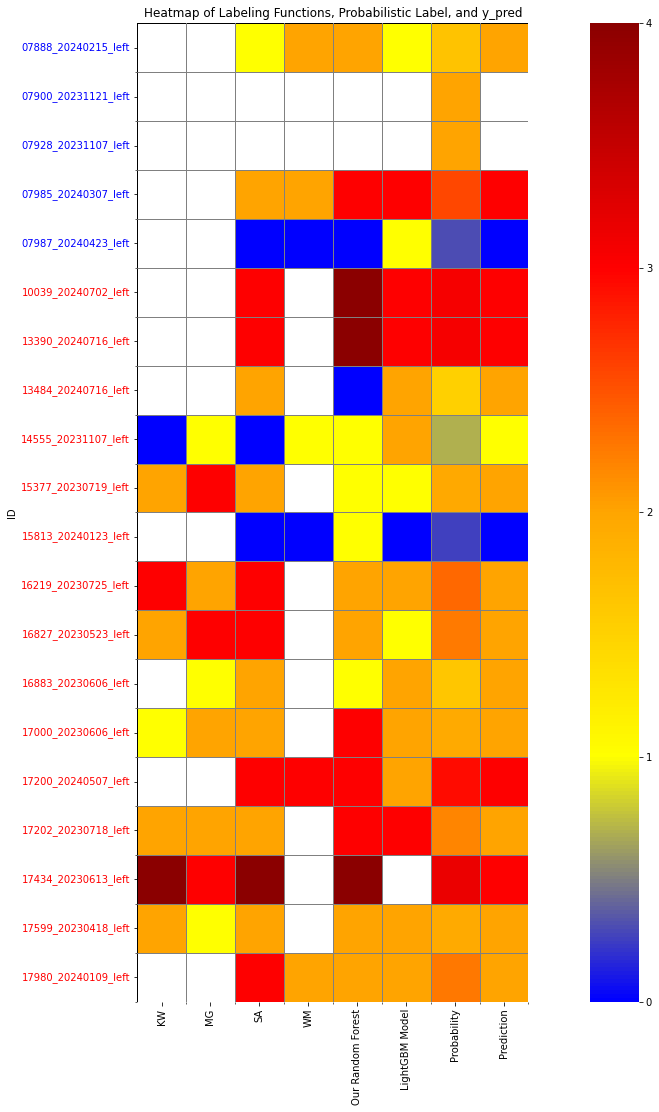

In [68]:
from snorkel.labeling.model.label_model import LabelModel
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap

def run_weak_supervision_new(L_train):

    # Train the label model
    label_model = LabelModel(cardinality=5, verbose=True)
    #L_train to array
    L_train = L_train.to_numpy()
    print(L_train.max())
    label_model.fit(L_train=L_train, n_epochs=100, log_freq=100, seed=12)

    
    # Predict on the training set
    preds_train, probs = label_model.predict(L=L_train, return_probs=True)
    
    return label_model, preds_train, probs


def draw_LFs(combined_df):
    # Define the custom colors: blue for 0, the gradient for intermediate values, and dark red for 4
    colors = ["blue", "yellow", "orange", "red", "darkred"]
    
    # Create a custom colormap that smoothly transitions between these colors
    custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)

    # Create a figure with a specified aspect ratio to ensure square cells
    plt.figure(figsize=(22, 18))
    
    # Draw the heatmap with the custom colormap
    ax = sns.heatmap(combined_df, cmap=custom_cmap, cbar=True, vmin=0, vmax=4, yticklabels=combined_df.index, square=True, linewidths=0.5, linecolor='black')
    plt.title('Heatmap of Labeling Functions, Probabilistic Label, and y_pred')

    # Customize the color bar to show ticks only at integer values
    cbar = ax.collections[0].colorbar
    cbar.set_ticks([0, 1, 2, 3, 4])
    cbar.set_ticklabels([0, 1, 2, 3, 4])

    # Customize the x-axis tick labels: color blue for labels starting with '07', red for others
    for tick_label in ax.get_yticklabels():
        if tick_label.get_text().startswith('07'):
            tick_label.set_color('blue')
        else:
            tick_label.set_color('red')

    # Draw the grid
    ax.set_xticks([x + 0.5 for x in ax.get_xticks()], minor=True)
    ax.set_yticks([y + 0.5 for y in ax.get_yticks()], minor=True)
    ax.grid(which='minor', color='gray', linestyle='-', linewidth=1)

    # Show the plot with the customized color bar
    plt.show()



#load data
L_df = pd.read_csv(L_file)
L_df.set_index('file_name', inplace=True)


label_model, preds_train, probs = run_weak_supervision_new(L_df)
combined_df = L_df.copy()
combined_df['Probability'] = (probs*[0,1,2,3,4]).sum(axis=1)
combined_df['Prediction'] = preds_train
#get ID from file_name
combined_df['ID'] = combined_df.index.str.split('_').str[0]+'_'+combined_df.index.str.split('_').str[1]+'_'+combined_df.index.str.split('_').str[2]
combined_df.set_index('ID', inplace=True)

combined_df.rename(columns={'classifier':'Our Random Forest','severity model': 'LightGBM Model'}, inplace=True)
#fill -1 with null
combined_df.replace(-1, np.nan, inplace=True)

draw_LFs(combined_df.iloc[50:70, :])

In [71]:
#save combined_df
combined_df.to_csv(r'\\files.ubc.ca\team\PPRC\Camera\Booth_Results\finger_tapping_ws\Experiment2\csvs\weak_supervision_results.csv', index=True)

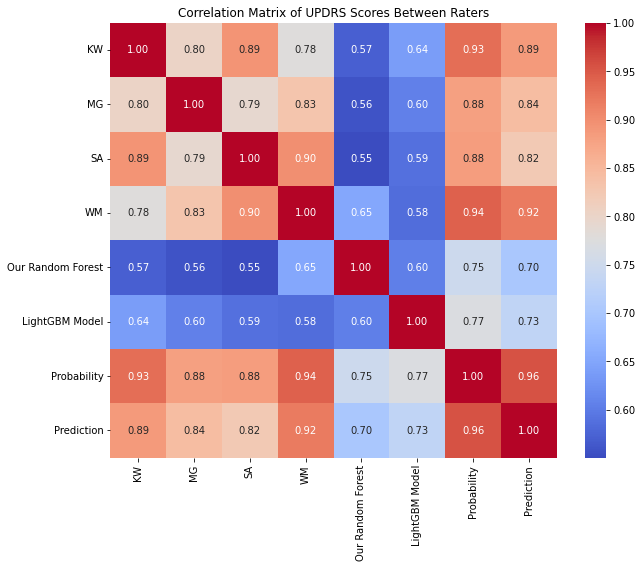

In [70]:
#generate the correlation matrix between the raters from the combined_updrs drop -1

combined_updrs = combined_df.replace(-1, np.nan)

correlation_matrix = combined_updrs.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of UPDRS Scores Between Raters')
plt.show()

c:\Users\atefe\.conda\envs\assessment\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [19] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\atefe\.conda\envs\assessment\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Classifier Accuracy (Random Forest): 0.6235294117647059
Mean Squared Error (Regressor): 0.7051022222222223
Mean Absolute Error (Regressor): 0.538313725490196
Accuracy: 0.6235294117647059


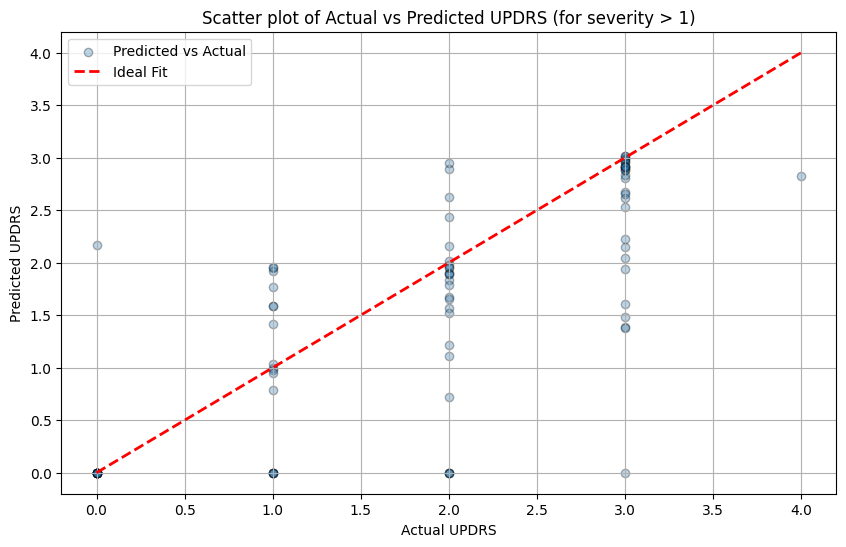

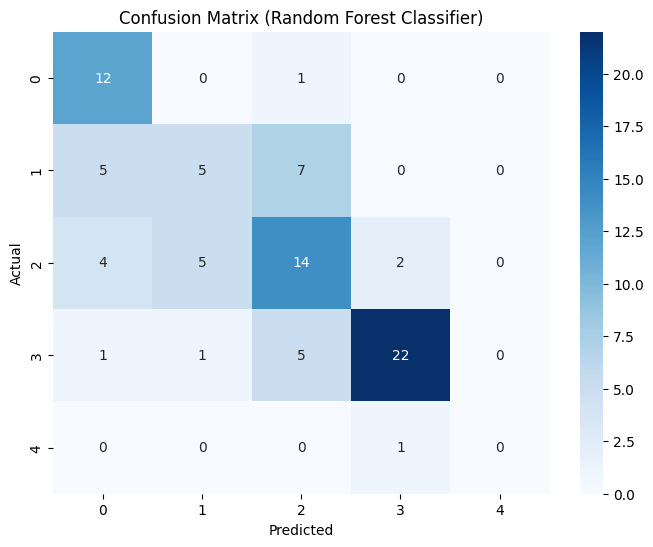

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import plotly.express as px

# Load the data
# file_l = r'\\files.ubc.ca\team\PPRC\Camera\Booth_Results\finger_tapping_ws\Experiment2\csvs\left_features_extracted_finger_distance.csv'
# file_r = r'\\files.ubc.ca\team\PPRC\Camera\Booth_Results\finger_tapping_ws\Experiment2\csvs\right_features_extracted_finger_distance.csv'
file_l = r'\\files.ubc.ca\team\PPRC\Camera\Booth_Processed\finger_tapping\left\csvs\left_features.csv'
file_r = r'\\files.ubc.ca\team\PPRC\Camera\Booth_Processed\finger_tapping\right\csvs\right_features.csv'
df = pd.read_csv(file_l)
df_r = pd.read_csv(file_r)
df = pd.concat([df, df_r])
combined_df = pd.read_csv(r'\\files.ubc.ca\team\PPRC\Camera\Booth_Results\finger_tapping_ws\Experiment2\csvs\weak_supervision_results.csv')
combined_df.set_index('ID', inplace=True)
labeled_df = combined_df.copy()
labeled_df['file_name'] = labeled_df.index + '_finger_tapping_distances.csv'

df = pd.merge(df, labeled_df[['file_name', 'Prediction']], on='file_name', how='left')
df = df.dropna()

# Define the features and target
X = df.drop(columns=['file_name', 'Prediction'])
y = df['Prediction']
file_names = df['file_name']
#Scale the data
from sklearn.preprocessing import StandardScaler



# Feature selection
selector = SelectKBest(score_func=f_classif, k=22)
#X = X.fillna(0)
selector.fit(X, y)
X_selected = selector.transform(X)
scaler = StandardScaler()
X_selected = scaler.fit_transform(X_selected)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test, file_names_train, file_names_test = train_test_split(X_selected, y, file_names, test_size=0.2, random_state=42)

# Apply SMOTE to balance the classes in the training data
smote = SMOTE(random_state=42, k_neighbors=1, sampling_strategy={0: 1000, 1: 400, 2: 400, 3: 300, 4: 300})
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# First Stage: Train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=300, random_state=42,criterion='gini')
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Predict using the classifier
y_pred_class = rf_classifier.predict(X_test)

# Calculate accuracy of the classifier
classifier_accuracy = accuracy_score(y_test, y_pred_class)
print("Classifier Accuracy (Random Forest):", classifier_accuracy)

# Second Stage: Apply the regressor only on predictions greater than 1
X_test_regressor = X_test[y_pred_class >= 1]
y_test_regressor = y_test[y_pred_class >= 1]

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=300, random_state=21, max_depth=8, criterion='absolute_error')

#regressor = GradientBoostingRegressor(n_estimators=300, random_state=21)
regressor.fit(X_train, y_train)
y_pred_regressor = regressor.predict(X_test_regressor)


# Combine the predictions for values <= 1 and > 1
y_test_combined = np.concatenate((y_test_regressor, y_test[y_pred_class < 1]))
y_pred_combined = np.concatenate((y_pred_regressor, y_pred_class[y_pred_class < 1]))
# Evaluate the regressor
mse = mean_squared_error(y_test_combined, y_pred_combined)
mae = mean_absolute_error(y_test_combined, y_pred_combined)

print("Mean Squared Error (Regressor):", mse)
print("Mean Absolute Error (Regressor):", mae)
accuracy = np.mean(y_test_combined == np.round(y_pred_combined))
print("Accuracy:", accuracy)
# Scatter plot of predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_combined, y_pred_combined, alpha=0.3, edgecolor='k', label='Predicted vs Actual')
plt.plot([y_test_combined.min(), y_test_combined.max()], [y_test_combined.min(), y_test_combined.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('Actual UPDRS')
plt.ylabel('Predicted UPDRS')
plt.title('Scatter plot of Actual vs Predicted UPDRS (for severity > 1)')
plt.legend()
plt.grid(True)
plt.show()

# Confusion matrix for the classifier
cm_classifier = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_classifier, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest Classifier)')
plt.show()






In [8]:
# t-SNE Visualization
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X)

# Create a DataFrame for visualization
df_tsne_train = pd.DataFrame(X_train_tsne, columns=['TSNE Component 1', 'TSNE Component 2'])
df_tsne_train['label'] = y.to_list()
df_tsne_train['file_name'] = file_names.to_list()

# Plot t-SNE results for the training data
fig_train = px.scatter(df_tsne_train, x='TSNE Component 1', y='TSNE Component 2', color='label', hover_data=['file_name'],
                       title='t-SNE Visualization of the Training Data')
fig_train.show()

In [44]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Load the data
file_l = r'\\files.ubc.ca\team\PPRC\Camera\Booth_Results\finger_tapping_ws\Experiment2\csvs\left_features_extracted_finger_distance.csv'
file_r = r'\\files.ubc.ca\team\PPRC\Camera\Booth_Results\finger_tapping_ws\Experiment2\csvs\right_features_extracted_finger_distance.csv'
file_l = r'\\files.ubc.ca\team\PPRC\Camera\Booth_Processed\finger_tapping\left\csvs\left_features.csv'
file_r = r'\\files.ubc.ca\team\PPRC\Camera\Booth_Processed\finger_tapping\right\csvs\right_features.csv'
df = pd.read_csv(file_l)
df_r = pd.read_csv(file_r)
df = pd.concat([df, df_r])
combined_df = pd.read_csv(r'\\files.ubc.ca\team\PPRC\Camera\Booth_Results\finger_tapping_ws\Experiment2\csvs\weak_supervision_results.csv')
combined_df.set_index('ID', inplace=True)
labeled_df = combined_df.copy()
labeled_df['file_name'] = labeled_df.index + '_finger_tapping_distances.csv'

df = pd.merge(df, labeled_df[['file_name', 'Prediction']], on='file_name', how='left')
df = df.dropna()

# Define the features and target
X = df.drop(columns=['file_name', 'Prediction'])
y = df['Prediction']
file_names = df['file_name']

# Feature selection
# Feature scaling
X = X.fillna(0)


selector = SelectKBest(score_func=f_classif, k=22)

X_selected = selector.fit_transform(X, y)

scaler = StandardScaler()
X_selected = scaler.fit_transform(X_selected)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test, file_names_train, file_names_test = train_test_split(X_selected, y, file_names, test_size=0.15, random_state=22)

# Apply SMOTE to balance the classes in the training data
smote = SMOTE(random_state=42, k_neighbors=1, sampling_strategy={0: 1000, 1: 400, 2: 600, 3: 300, 4: 300})
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Hyperparameter tuning for Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced', 'balanced_subsample']
}
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)
best_rf_classifier = grid_search.best_estimator_

# Predict using the tuned classifier
y_pred_class = best_rf_classifier.predict(X_test)

# Calculate accuracy of the classifier
classifier_accuracy = accuracy_score(y_test, y_pred_class)
print("Classifier Accuracy (Random Forest):", classifier_accuracy)

# Second Stage: Apply the regressor only on predictions greater than 1
X_test_regressor = X_test[y_pred_class >= 1]
y_test_regressor = y_test[y_pred_class >= 1]

# Hyperparameter tuning for Random Forest Regressor
regressor = RandomForestRegressor(random_state=21)
regressor_param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [5, 8, 15],
    'min_samples_split': [2, 5, 10]
}
regressor_grid_search = GridSearchCV(regressor, regressor_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
regressor_grid_search.fit(X_train, y_train)
best_regressor = regressor_grid_search.best_estimator_

# Predict using the tuned regressor
y_pred_regressor = best_regressor.predict(X_test_regressor)

# Combine the predictions for values <= 1 and > 1
y_test_combined = np.concatenate((y_test_regressor, y_test[y_pred_class < 1]))
y_pred_combined = np.concatenate((y_pred_regressor, y_pred_class[y_pred_class < 1]))

# Evaluate the regressor
mse = mean_squared_error(y_test_combined, y_pred_combined)
mae = mean_absolute_error(y_test_combined, y_pred_combined)
accuracy = np.mean(y_test_combined == np.round(y_pred_combined))

print("Mean Squared Error (Regressor):", mse)
print("Mean Absolute Error (Regressor):", mae)
print("Overall Accuracy:", accuracy)



c:\Users\atefe\.conda\envs\assessment\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [19] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\atefe\.conda\envs\assessment\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Classifier Accuracy (Random Forest): 0.59375
Mean Squared Error (Regressor): 0.6265256647584541
Mean Absolute Error (Regressor): 0.5842843453328149
Overall Accuracy: 0.53125


In [49]:
import joblib
from sklearn.pipeline import Pipeline

# Save the classifier and its pipeline
classifier_pipeline_filename = "../../models/finger_tapping_classifier_pipeline_v1.pkl"
regressor_model_filename = "../../models/finger_tapping_regressor_v1.pkl"

# Create a pipeline with the scaler, feature selector, and the classifier
classifier_pipeline = Pipeline([
    ('feature_selection', selector),
    ('scaler', scaler),
    
    ('classifier', best_rf_classifier)
])

# # Fit the classifier pipeline with the full training data
# classifier_pipeline.fit(X_train_resampled, y_train_resampled)

# Save the classifier pipeline
joblib.dump(classifier_pipeline, classifier_pipeline_filename)
print(f"Classifier pipeline saved to {classifier_pipeline_filename}")

regressor_pipeline = Pipeline([
    ('feature_selection', selector),
    ('scaler', scaler),
    ('regressor', best_regressor)
])
# Save the best regressor model separately (if needed)
joblib.dump(regressor_pipeline, regressor_model_filename)
print(f"Regressor model saved to {regressor_model_filename}")


Classifier pipeline saved to ../../models/finger_tapping_classifier_pipeline_v1.pkl
Regressor model saved to ../../models/finger_tapping_regressor_v1.pkl
